## Esercitazione 8  del    23 Aprile 2024


## Condizionamento del problema della soluzione di un sistema lineare

# Esercizio 1
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma infinito senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1) e risolverlo usando il metodo solve del modulo linalg di Scipy.
- perturbare il vettore dei termini noti della quantità
- 
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [2]:
import numpy as np
# usato per creare la matrice di Hilbert
import scipy.linalg as spl 
import SolveTriangular
from scipy.linalg import lu
from scipy.linalg import qr
import matplotlib.pyplot as plt

In [29]:
x = np.arange(1.0,7.0)
A = np.vander(x, increasing=True)
print(A)

K = np.linalg.norm(np.linalg.inv(A), np.inf) * np.linalg.norm(A, np.inf)
print("Indice di condizionamento :", K)
print("Indice con funzione :", np.linalg.cond(A, np.inf))

x = [1,1,1,1,1,1] # questa è la soluzione esatta
b=np.sum(A,axis=1).reshape(6,1) #Calcolo la somma degli elementi di ogni riga 
f = np.linalg.solve(A, b)
print("Risoluzione : ", f)
lam_b = b.copy()
lam_b[0] += 0.025
lam_f = np.linalg.solve(A, lam_b)
print("Risoluzione con perturbazione : ", lam_f)

err_dati = (np.linalg.norm(b-lam_b, np.inf))/(np.linalg.norm(b, np.inf))
print("Errore dati : ", err_dati)
err_ris = (np.linalg.norm(f-lam_f, np.inf))/(np.linalg.norm(f, np.inf))
print("Errore risultati : ", err_ris)
# riassunto è molto malcondizionato perchè per una perturbazione dei dati
# dell'2.6*10^-4% si ottiene una perturbazione sui risultati del 22%


[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03 7.776e+03]]
Indice di condizionamento : 1204321.0666666434
Indice con funzione : 1204321.0666666434
Risoluzione :  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Risoluzione con perturbazione :  [[1.15      ]
 [0.7825    ]
 [1.12083333]
 [0.96770833]
 [1.00416667]
 [0.99979167]]
Errore dati :  2.679241238881187e-06
Errore risultati :  0.21749999999149086


## Esercizio 2
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [46]:
A = np.array([ [6, 63, 662.2], [63, 662.2, 6967.8], [662.2, 6967.8, 73393.5664] ])
b = np.array([1.1, 2.33, 1.7]).reshape(3, 1)
sol = np.linalg.solve(A, b)
lam_A = A.copy()
lam_A[0][0] += 0.01
lam_sol = np.linalg.solve(lam_A, b)
err_dati = (np.linalg.norm(A-lam_A, np.inf))/(np.linalg.norm(A, np.inf))
print("Indice di cond {:e}".format(np.linalg.cond(A, np.inf)))
# per cambiare il formato e vederlo come e^+x usare {:e}".format(numero)
print("Errore sui dati : ", err_dati)
err_sol = (np.linalg.norm(sol-lam_sol, np.inf))/(np.linalg.norm(sol, np.inf))
print("Errore sui risultati : ", err_sol)

Indice di cond 1.975302e+10
Errore sui dati :  1.2342088165597937e-07
Errore sui risultati :  0.9995081547933965


## Esercizio 3
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

In [55]:
A = spl.hilbert(4)
b = np.ones(4).reshape(4,1)
x = spl.solve(A, b)
print(x)
lam_b = b.copy() + np.array([(0.01*(-1)**i) for i in range(4)]).reshape(4,1)
lam_x = spl.solve(A, lam_b)

err_dati = (np.linalg.norm(b-lam_b, np.inf))/(np.linalg.norm(b, np.inf))
print("Indice di cond {:e}".format(np.linalg.cond(A, np.inf)))
# per cambiare il formato e vederlo come e^+x usare {:e}".format(numero)
print("Errore sui dati : ", err_dati)
err_x = (np.linalg.norm(x-lam_x, np.inf))/(np.linalg.norm(x, np.inf))
print("Errore sui risultati : ", err_x)

[[  -4.]
 [  60.]
 [-180.]
 [ 140.]]
Indice di cond 2.837500e+04
Errore sui dati :  0.010000000000000009
Errore sui risultati :  0.7566666666666719


## Metodi diretti per la soluzione numerica di un sistema lineare

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,L,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

In [37]:
import numpy as np
import scipy as sp
from scipy.linalg import lu
A=np.array([[2,1],[3,4]])
PT,L,U=lu(A)  #Restituisce in output la trasposta della matrice di Permutazione
P=PT.T.copy()   #P è la matrice di permutazione
print("A=",A)
print("L=",L)
print("U=",U)
print("P=",P)
#LU è la fattorizzazione di P*A (terorema 2)
A1=P@A # equivale al prodotto matrice x matrice np.dot(P,A)
A1Fatt=L@U # equivale a np.dot(L,U)
print("Matrice P*A \n", A1)
print("Matrice ottenuta moltipicando Le ed U \n",A1Fatt)


A= [[2 1]
 [3 4]]
L= [[1.         0.        ]
 [0.66666667 1.        ]]
U= [[ 3.          4.        ]
 [ 0.         -1.66666667]]
P= [[0. 1.]
 [1. 0.]]
Matrice P*A 
 [[3. 4.]
 [2. 1.]]
Matrice ottenuta moltipicando Le ed U 
 [[3. 4.]
 [2. 1.]]


## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice in input non è definita positiva, restituisce un errore.

In [38]:
from scipy.linalg import cholesky
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
print(A)

[[ 2  1  3]
 [ 1  5  7]
 [ 3  7 12]]


In [39]:
L=cholesky(A,lower=True)
print(L)
A1=L@L.T
print("A1=\n",A1)

[[1.41421356 0.         0.        ]
 [0.70710678 2.12132034 0.        ]
 [2.12132034 2.59272486 0.8819171 ]]
A1=
 [[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

In [40]:
from scipy.linalg import qr
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
Q,R=qr(A)
print("Q=",Q)
print("R=",R)
A1=Q@R
print(A1)

Q= [[-0.53452248  0.6882472  -0.49051147]
 [-0.26726124 -0.6882472  -0.67445327]
 [-0.80178373 -0.22941573  0.55182541]]
R= [[ -3.74165739  -7.48331477 -13.09580085]
 [  0.          -4.35889894  -5.50597761]
 [  0.           0.           0.42919754]]
[[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Esercizio 4
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  implementati nel file SolveTriangular.py.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

In [5]:
import SolveTriangular

def LUsolve(P, A, L, U, b):
    y, flag = SolveTriangular.Lsolve(L,P@b)
    if (flag == 1):
        print("errore della risoluzione")
        x = []
    else:
        x, flag = SolveTriangular.Usolve(U, y)
    
    return x

In [76]:
from scipy.linalg import lu
A=np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
b = np.sum(A,axis=1).reshape(4,1)

PT,L,U=lu(A)  #Restituisce in output la trasposta della matrice di Permutazione
P=PT.T.copy()   #P è la matrice di permutazione
print("A=",A)
print("L=",L)
print("U=",U)
print("P=",P)
x = LUsolve(P, A, L, U, b)
print("soluzione :", x)

A= [[2 5 8 7]
 [5 2 2 8]
 [7 5 6 6]
 [5 4 4 8]]
L= [[ 1.          0.          0.          0.        ]
 [ 0.28571429  1.          0.          0.        ]
 [ 0.71428571  0.12        1.          0.        ]
 [ 0.71428571 -0.44       -0.46153846  1.        ]]
U= [[ 7.          5.          6.          6.        ]
 [ 0.          3.57142857  6.28571429  5.28571429]
 [ 0.          0.         -1.04        3.08      ]
 [ 0.          0.          0.          7.46153846]]
P= [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
soluzione : [[1.]
 [1.]
 [1.]
 [1.]]


## Esercizio 5
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

In [10]:
def solve_nsis(A, B):
    X = []
    it = 0
    
    # inizializzo le variabili che servono per la funzione LUsolve
    PT, L, U = lu(A)
    P = PT.T.copy()
    
    while (it < B.shape[0] ):
        sol = LUsolve(P, A, L, U, B[:,it])
        if it == 0:
            X = sol.copy()
        else:
            X = np.concatenate((X, sol), axis=1)
        
        it += 1
    
    return X

In [16]:
A = np.array([ [3, 5, 7], [2, 3, 4], [5, 9, 11] ])
A2 = np.array([ [1,2,3,4], [2,-4,6,8], [-1,-2,-3,-1], [5,7,0,1] ])
B = np.eye(A.shape[0])
X = solve_nsis(A, B)
print("Fatto con il nostro metodo : \n",X)
print("Fatto con linalg.inv : \n",np.linalg.inv(A))

Fatto con il nostro metodo : 
 [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
Fatto con linalg.inv : 
 [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]


## Esercizio 6
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


In [27]:
PT, L, U = lu(A2)
P = PT.T.copy()

det1 =np.prod(np.diag(U)) * np.linalg.det(P)
# il determinante di A di una matrice fattorizzata LU di PA
# viene calcolata facendo la produttoria dei valori della diag principale
# U * il det di P che equalivale a (-1)**s dove s sono il numero
# di scambi effettuati per ricavare U che è la matrice a scala usando Gauss
print(det1)

-359.9999999999999


## Esercizio 7
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

NB: per il calcolo della matrice di Hankel utilizzare la function 

def Hankel(n):

    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

In [39]:
def QRsolve(Q, R, b):
    y = np.linalg.solve(Q, b)
    x = np.linalg.solve(R, y)
    
    return x

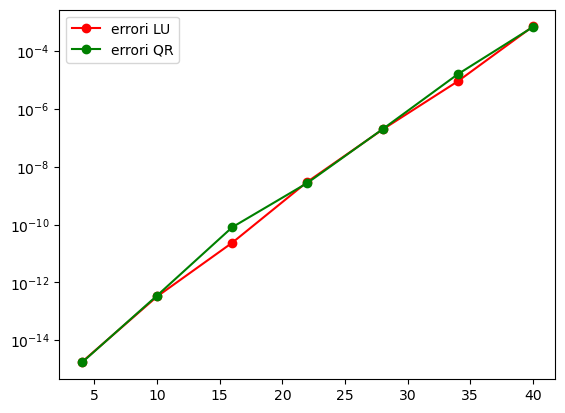

In [55]:
def Hankel(n):

    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

err_rel_LU = []
err_rel_QR = []

# non chiedermi perchè è diverso da ciò che è scritto nella consegna
# range(4, 41, 6) primo valore inizio, secondo valore fine, terzo passo
for n in range(4, 41, 6):
    A_n = Hankel(n)
    b = np.sum(A_n,axis=1).reshape(n,1)
    x = np.array([ 1 for i in range(A_n.shape[0])]).reshape(n,1)
    
    PT, L, U = lu(A_n)
    P = PT.T.copy()
    x_LU = LUsolve(P, A_n, L, U, b)
    err_rel_LU.append( np.linalg.norm(x_LU-x, 2)/np.linalg.norm(x , 2) )
    #print("Grado Hankel ", n)
    #print("Sol LU ", x_LU)
    
    Q,R = qr(A_n)
    x_QR = QRsolve(Q, R, b)
    err_rel_QR.append( np.linalg.norm(x_QR-x, 2)/np.linalg.norm(x , 2) )
    #print("Sol QR ", x_QR)

plt.semilogy(range(4, 41, 6), err_rel_LU,'ro-', range(4, 41, 6), err_rel_QR,'go-')
plt.legend(['errori LU', 'errori QR'])
    

## Esercizio 8

Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?

## Metodi iterativi di Jacobi, Guass-Seidel e Gausseidel_SOR per la soluzione numerica di un sistema lineare

## Esercizio 9
Implementare la  funzione $jacobi(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Jacobi. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [32]:
def jacobi(A, b, x0, toll, itmax):
    errore=1000
    # inizializzo le matrici
    n = A.shape[0]
    D = np.diag(A).reshape(n,1)
    D1 = np.diag(np.diag(A))
    D_INV = np.linalg.inv(D1)
    #print(D)
    #print(D_INV)
    d_inv = 1/D
    #print(d_inv)
    E = np.tril(A, -1)
    F = np.triu(A, +1)
    
    M = D
    N = -(E+F)
    it = 0
    x1 = d_inv*(b+N@x0)
    x_prova = D_INV@N@x0+D_INV@b
    
    err_vet = []
    #print(x1)
    #print(x_prova)
    
    while (it <= itmax and errore >= toll):
        x0 = x1
        x1 = D_INV@N@x0+D_INV@b
        errore = np.linalg.norm(x1 - x0, 2)/np.linalg.norm(x0, 2)
        err_vet.append(errore)
        it += 1
        
    return x1, it, err_vet
    

## Esercizio 10
Implementare la  funzione $gauss$_$seidel(A,b,x0,toll,it_max)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [33]:
def gauss_seidel(A, b, x0, toll, itmax):
    errore=1000
    # inizializzo le matrici
    n = A.shape[0]
    D1 = np.diag(np.diag(A))
    E = np.tril(A, -1)
    F = np.triu(A, +1)
    
    M = E+D1
    N = -F
    M_INV = np.linalg.inv(M)
    it = 0
    x1 = M_INV@N@x0+M_INV@b
    err_vet = []
    #print(x1)
    
    Tg = M_INV@N
    rag_spettr = np.max(np.abs(np.linalg.eigvals(Tg)))
    print(rag_spettr)
    
    while (it <= itmax and errore >= toll):
        x0 = x1
        x1 = M_INV@N@x0+M_INV@b
        errore = np.linalg.norm(x1 - x0, 2)/np.linalg.norm(x0, 2)
        err_vet.append(errore)
        it += 1
        
    return x1, it, err_vet

## Esercizio 11
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei sistemi lineare Ax=b, dove 
- A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=500 e x0=np.zeros(A.shape[0]

## Esercizio 12
Implementare la  funzione $gauss$_$seidel$_sor(A,b,x0,omega, toll,itmax) per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel-SOR
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- omega: il parametro di rilassamento
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [38]:
def gauss_seidel_sor(A, b, x0, toll, itmax, omega):
    errore=1000
    # inizializzo le matrici
    n = A.shape[0]
    D1 = np.diag(np.diag(A))
    E = np.tril(A, -1)
    F = np.triu(A, +1)
    
    M = E+D1
    N = -F
    M_INV = np.linalg.inv(M)
    it = 0
    
    inv_temp = np.linalg.inv(D1+omega*E)
    Tomega = inv_temp@((1-omega)*D1-omega*F)
    rag_spettr = np.max(np.abs(np.linalg.eigvals(Tomega)))
    print(rag_spettr)
    xold = x0.copy()
    xnew = x0.copy()
    
    err_vet = []
    
    while (it <= itmax and errore >= toll):
        # mi calcolo il vettore colonna dato da b
        # e la moltiplicazione tra F e xold
        temp = b - F@xold
        # ottengo x tilde usando Lsolve dal package SolveTriangular
        xtilde, flag = SolveTriangular.Lsolve(M, temp)
        # calcolo xk nuovo
        xnew = (1-omega)*xold+omega*xtilde
        errore = np.linalg.norm(xnew - xold, 2)/np.linalg.norm(xnew, 2)
        err_vet.append(errore)
        xold = xnew.copy()
        it += 1
        
    return x1, it, err_vet

In [30]:
A=np.array([[4,1,3],[3,4,1],[1,1,17]])
A3 = np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])
b = np.sum(A,axis=1).reshape(A.shape[0],1)
toll=1e-8 
it_max=500 
x0=np.zeros(A.shape[0]).reshape(A.shape[0],1)

x1, n_it = jacobi(A, b, x0, toll, it_max)
#print("x ", x1, "num_it ", n_it)
x1, n_it = gauss_seidel(A, b, x0, toll, it_max)
print("x ", x1, "num_it ", n_it)


ValueError: too many values to unpack (expected 2)

## Esercizio 13
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

In [21]:
def creaPoisson(n):
    #costruire una matrice di Poisson
    d=np.ones((n))*4
    e=-np.ones((n-1,))
    f=-np.ones((n-3,))
    A=np.diag(d)+np.diag(e,-1)+np.diag(e,1)+np.diag(f,-3)+np.diag(f,3)
    return A

0.7185579379397853
0.5103393892922706


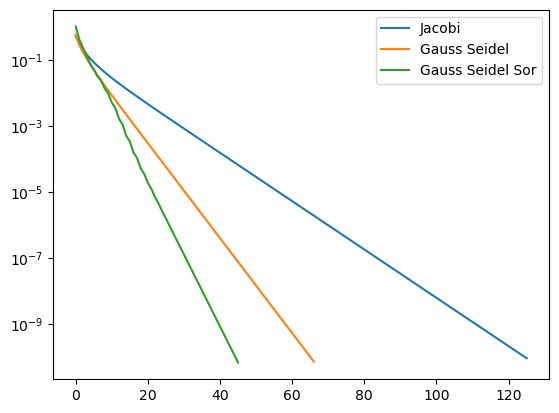

In [39]:
A=creaPoisson(10)
b=np.sum(A,axis=1)
toll=1e-10
it_max=1000
n=A.shape[0]
x0=np.zeros(A.shape[0]).reshape(n,1)
b=np.sum(A,axis=1).reshape(n,1)
sol_jac,it_jac,err_vet_jac=jacobi(A,b,x0,toll,it_max)
plt.semilogy(np.arange(it_jac),err_vet_jac)
#print("sol=",sol_jac,"it ",it_jac)
solgs,itgs,err_vet_gs=gauss_seidel(A,b,x0,toll,it_max)
#print("solgs=",solgs,"it ",itgs)
plt.semilogy(np.arange(itgs),err_vet_gs)
 
omega=1.4
solgs_sor,itgs_sor,err_vet_gs_sor=gauss_seidel_sor(A,b,x0,toll,it_max,omega)
#print("solgs_sor=",solgs_sor,"it ",itgs_sor)
plt.semilogy(np.arange(itgs_sor),err_vet_gs_sor)
plt.legend(['Jacobi','Gauss Seidel','Gauss Seidel Sor'])
plt.show()

#Si nota come a raggio spettrale più piccolo, corrisponde una magguire velocità (minor numero di iterazioni)